#Rich gets richer Phenomenon(aka matthew effect, aka preferential attachment) 
#Barabasi-Albert Model

In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt
import time 
import numpy as np

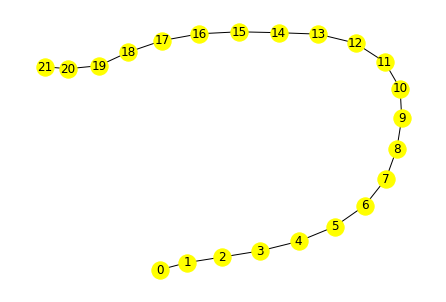

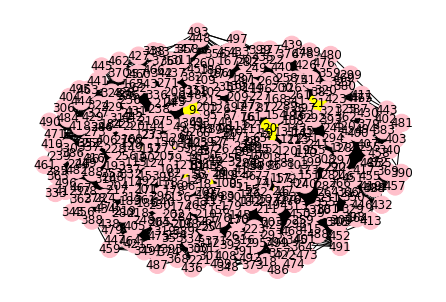

In [ ]:
def barabasi(g,n,m):
  init=len(list(g.nodes()))
  l=['yellow']*init #node color list
  nodes_tb_added=n-init
  for i in range(init,nodes_tb_added+init):
    g=add_node(g,m,i)
    l.append("pink")
  #print(list(g.nodes()))
  return g,l

def add_node(g,m,node):
  '''new nodes added in the network based on preferential attachment'''
  prob=get_prob(g)
  cumilative=get_cumilative(prob)
  g.add_node(node)
  while g.degree(node)!=m:
    for i in list(g.nodes()):
      x=r.random()
      if g.degree(node)==m: break
      elif (not g.has_edge(i,node)) and (i!=node) and x>cumilative[int(i)-1] and x<=cumilative[i]: 
        g.add_edge(i,node)
        #print(i)
  return g


def get_prob(g):
  '''given a graph g, this function returns a dictionary of 
  (node,node's probability of getting connected to the new coming node) 
  as (key,value) pairs''' 
  degrees=nx.degree(g)
  e=len(g.edges())
  deg_sum=2*e
  p={}
  for i in g.nodes():
    p[i]=degrees[i]/deg_sum
  return p

def get_cumilative(p):
  '''given a dictionary of probabilities of each node,
  this function returns a dictionary of cumilative probabilities of each node'''
  n=len(p)
  c,prev={-1:0.0,},0
  for i,j in p.items():
    prev=j+prev
    c[i]=prev
  #print(c)
  return c
    
  
n=5*10**2   #total number of nodes in the network
m0=n//5    #maximum initial number of nodes
init_nodes=r.randint(2,m0)
m=init_nodes-1    #number of edges a new node is required to have

G=nx.path_graph(init_nodes) #because we need each node's degree to be atleast 1
nx.draw(G,with_labels=True,node_color="yellow")
plt.show()
G,l=barabasi(G,n,m)

nx.draw(G,with_labels=True,node_color=l)
plt.show()

In [ ]:
d=nx.pagerank(G)
d1=dict(sorted(d.items(), key=lambda x:x[1],reverse=True))
print(d1)

core=nx.core_number(G)
sorted_core=dict(sorted(core.items(), key=lambda x:x[1]))
print(sorted_core)

{22: 0.0074148724488254355, 28: 0.007013829584357046, 25: 0.006975120277594428, 30: 0.0066895573393055165, 24: 0.006576518338455785, 23: 0.006137985927266505, 32: 0.005708522316034469, 26: 0.005643765267391201, 31: 0.005632316047091585, 33: 0.005580482417544334, 29: 0.005299057302552059, 27: 0.005272438679361555, 45: 0.005178379535954426, 39: 0.005169299269449338, 41: 0.0051420916384161035, 43: 0.0049722670402149415, 47: 0.004931310680878738, 2: 0.0048680423244611614, 35: 0.004826136294364789, 50: 0.004636831670620227, 42: 0.0046355128356035235, 6: 0.004601025868434913, 34: 0.0045474604370780115, 57: 0.0044993162539767265, 44: 0.004428247609755907, 37: 0.004392348664607306, 10: 0.0043601558626625014, 38: 0.004262082804857294, 15: 0.004253874537322998, 36: 0.004214840862032957, 17: 0.0041982102695195525, 53: 0.004078277606194967, 58: 0.004024843945712796, 7: 0.004016550153283653, 48: 0.003931282428359896, 61: 0.0038726732634396643, 46: 0.003827312702853543, 62: 0.003753390335872916, 71:

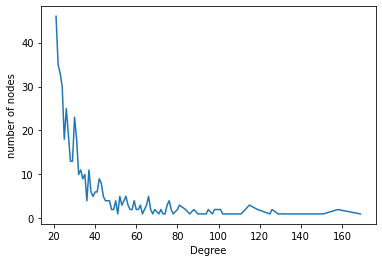

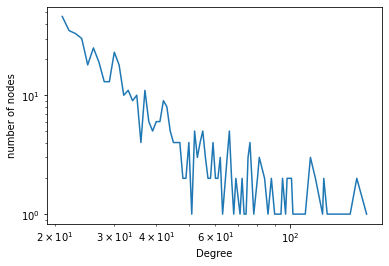

In [ ]:
def plot_deg_dist(g):
  '''plots degree distribution of graph g'''
  degrees=list(dict(nx.degree(g)).values())
  uni_deg=list(set(degrees))
  uni_deg.sort()
  count=[]
  for i in uni_deg: count+=[degrees.count(i)]
  plt.plot(uni_deg,count) #power law distribution
  plt.xlabel('Degree')
  plt.ylabel('number of nodes')
  plt.show()
  plt.loglog(uni_deg,count) #straight line
  plt.xlabel('Degree')
  plt.ylabel('number of nodes')
  plt.show()
plot_deg_dist(G)


# Implementing a Random Graph (Erdos- Renyi Model)

Erdos- Renyi follows normal degree distribution(adding edges can be seen as independent bernoulli trails) and not power law degree distribution

In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt

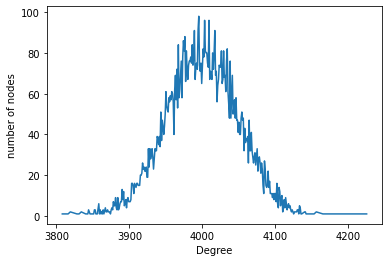

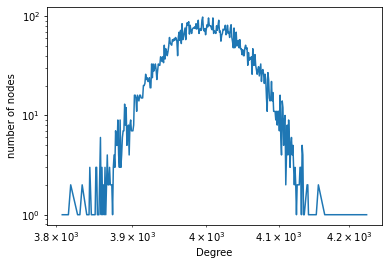

In [ ]:
def erdos_renyi_graph(n,p):
  g=nx.Graph()
  g.add_nodes_from(list(range(n)))
  for i in g.nodes():
    for j in g.nodes():
      if i>j and r.random()<=p: g.add_edge(i,j)
  return g

n,p=10**4,0.4
G=erdos_renyi_graph(n,p)
#nx.draw(G,with_labels=True,node_color="yellow")   
#plt.show()
plot_deg_dist(G) #function from previous to previous cell

#Forced Versus Random Removal of Nodes and Edges (Attack Survivability)

In [ ]:
import random as r
import networkx as nx
import matplotlib.pyplot as plt

#Real world networks

In [ ]:
#G=nx.read_edgelist('/content/drive/MyDrive/email-Enron.txt')

G=nx.read_edgelist('/content/drive/MyDrive/com-youtube.ungraph 2.txt')
#the above dataset is downloaded from : https://snap.stanford.edu/data/com-Youtube.html
print(nx.info(G))

Graph with 1134890 nodes and 2987624 edges


#Random removal

In [ ]:
def remove_random_edges(g):
  x=nx.is_connected(g)
  c=0  
  while x:
    edge=r.choice(list(g.edges()))
    g.remove_edge(edge[0],edge[1])
    c+=1
    x=nx.is_connected(g)
  return c,g

def remove_random_nodes(g):
  x=nx.is_connected(g)
  c=0  
  while x:
    node=r.choice(list(g.nodes()))
    g.remove_node(node)
    c+=1
    x=nx.is_connected(g)
  return c,g

H=G.copy()
c,H=remove_random_edges(H)
print("Edges removed : ",c)

H=G.copy()
c,H=remove_random_nodes(H)
print("Nodes removed : ",c)

#nx.draw(G,with_labels=True,node_color='yellow')

Edges removed :  5
Nodes removed :  11


#Forced removal

In [ ]:
def forced_edge_removal(g):
  x=nx.is_connected(g)
  c=0  
  while x:
    edge=get_highest_betweenness_edge(g)
    g.remove_edge(edge[0],edge[1])
    c+=1
    x=nx.is_connected(g)
  return c,g

def get_highest_betweenness_edge(g):
  betweenness=nx.edge_betweenness_centrality(g)
  sorted_betweenness=dict(sorted(betweenness.items(), key=lambda x:x[1]),reverse=True)
  return list(sorted_betweenness.keys())[0]

def forced_node_removal(g):
  x=nx.is_connected(g)
  c=0  
  while x:
    node=get_highest_degree_node(g)
    g.remove_node(node)
    c+=1
    if list(g.nodes())==[]: return c,g
    else : x=nx.is_connected(g)
  return c,g

def get_highest_degree_node(g):
  degree={}
  for i in g.nodes():
    degree[i]=g.degree(i)
  sorted_degree=dict(sorted(degree.items(), key=lambda x:x[1]),reverse=True)
  return list(sorted_degree.keys())[0]




In [ ]:
H=G.copy()
c,H=forced_edge_removal(H)
print("Edges removed : ",c)

H=G.copy()
c,H=forced_node_removal(H)
print("Nodes removed : ",c)

#nx.draw(G,with_labels=True,node_color='yellow')

#Random network

In [ ]:
g=nx.erdos_renyi_graph(10**3,0.4)

#random removal

In [ ]:
H=g.copy()
c,H=remove_random_edges(H)
print("Edges removed : ",c)

H=g.copy()
c,H=remove_random_nodes(H)
print("Nodes removed : ",c)

Edges removed :  1660
Nodes removed :  94


#forced removal

In [ ]:
H=g.copy()
c,H=forced_node_removal(H)
print("Nodes removed : ",c)

H=g.copy()
c,H=forced_edge_removal(H)
print("Edges removed : ",c)